<div style="width:100%; height:60px; background-color:aqua; display:flex">
<div style="display:flex; flex-direction:row; justify-content:center">
<h2 style="color:white"><strong>K Means Clustering</strong></h2>
</div>
</div>

<h3 style="color:white"><p>Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.</p> 

<p>K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.</p>

<p>In some cases, K is not clearly defined, and we have to think about the optimal number of K. K Means clustering performs best data is well separated. When data points overlapped this clustering is not suitable. K Means is faster as compare to other clustering technique. It provides strong coupling between the data points. K Means cluster do not provide clear information regarding the quality of clusters. Different initial assignment of cluster centroid may lead to different clusters. Also, K Means algorithm is sensitive to noise. It may have stuck in local minima.</p></h3>

<h2 style="color:aqua;font-style:italic;font-weight:bold">What is the objective of k-means clustering?
<h5 style="color:white">
<p>The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.</p>
</h5>
</h2>

<h2 style="color:aqua;font-style:italic;font-weight:bold">How k-means clustering works?
<h5 style="color:white">
<p>We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm, an unsupervised learning algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.</p>

<p>(It will help if you think of items as points in an n-dimensional space). The algorithm will categorize the items into k groups or clusters of similarity. To calculate that similarity, we will use the Euclidean distance as a measurement.</p>

<p>The algorithm works as follows:  

<ol>
<li>First, we randomly initialize k points, called means or cluster centroids.</li>
<li>We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.</li>
<li>We repeat the process for a given number of iterations and at the end, we have our clusters.</li></ol></p>

<p>The “points” mentioned above are called means because they are the mean values of the items categorized in them. To initialize these means, we have a lot of options. An intuitive method is to initialize the means at random items in the data set. Another method is to initialize the means at random values between the boundaries of the data set (if for a feature x, the items have values in [0,3], we will initialize the means with values for x at [0,3]).</p> 
</h5>
</h2>

<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:40%;height:auto; background-color:white" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/k_means_clustering.png">
<img style="width:40%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/k_means_exp.jfif">
</div>

<h2 style="color:aqua;font-style:italic;font-weight:bold">Calculating Clusters</h2>
<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:24%;height:auto;" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/calculating_clusters_1.png">
<img style="width:24%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/calculating_clusters_2.png">
<img style="width:24%;height:auto;" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/calculating_clusters_3.png">
<img style="width:24%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/calculating_clusters_4.png">
</div>

<h2 style="color:aqua;font-style:italic;font-weight:bold">Determining the value of K</h2>
<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-around;">
<img style="width:45%;height:auto;" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/sse_calculation.png">
<img style="width:45%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/elbow_technique.png">
</div>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf, keras
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

2024-09-04 22:58:31.932864: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 22:58:32.076696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 22:58:32.114871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 22:58:35.534774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('income.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


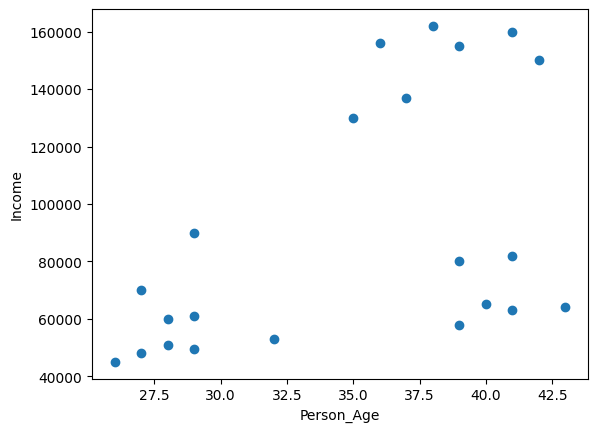

In [5]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Person_Age')
plt.ylabel('Income')
plt.show()

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [11]:
df['cluster'] = y_predicted

In [12]:
df.head(n=10)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
